In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data source:
[databank](https://databank.worldbank.org/reports.aspx?source=2&series=SL.UEM.TOTL.ZS&country=DEU#)

*Intro min wage Ireland 1 April 2000*

In [149]:
path = r'C:\Users\matte\OneDrive\Desktop\GitHub\data\minimun w eff\minimun_wage_countries.xlsx'

df = pd.read_excel(path).drop(columns=['Series Name','Series Code'])

df.head()

,Country Name,Country Code,1987 [YR1987],1988 [YR1988],1989 [YR1989],1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],...,2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
0,Germany,DEU,..,..,..,..,56.259,55.009,53.832,53.083,...,52.917,54.028,54.785,54.793,55.232,56.593,56.838,57.194,57.402,57.390
1,Austria,AUT,..,..,..,..,53.930,54.558,54.281,56.969,...,55.833,56.892,57.557,57.109,57.348,57.559,57.672,57.535,57.164,57.113
2,Denmark,DNK,..,..,..,..,61.657,61.960,60.148,59.204,...,63.359,63.213,62.685,60.263,58.579,58.151,57.450,56.887,57.015,57.469
3,Finland,FIN,..,..,..,..,59.302,54.893,51.363,50.575,...,56.273,57.006,57.525,55.449,54.822,55.198,55.111,54.256,53.821,53.381
4,Sweden,SWE,..,..,..,..,64.201,61.245,57.596,56.709,...,58.889,59.801,59.899,58.073,57.833,58.727,58.741,59.123,59.323,59.779


In [150]:
# Rename columns;
# eg: 1987 [YR1987] --> 1987

df.rename(columns={'Country Name':'name', 'Country Code':'code'}, inplace=True)

df.rename(columns={old_c: new_c for old_c, new_c in zip(df.columns.to_list()[2:], range(1987, 2016))},
          inplace=True)

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    10 non-null     object 
 1   code    10 non-null     object 
 2   1987    10 non-null     object 
 3   1988    10 non-null     object 
 4   1989    10 non-null     object 
 5   1990    10 non-null     object 
 6   1991    10 non-null     float64
 7   1992    10 non-null     float64
 8   1993    10 non-null     float64
 9   1994    10 non-null     float64
 10  1995    10 non-null     float64
 11  1996    10 non-null     float64
 12  1997    10 non-null     float64
 13  1998    10 non-null     float64
 14  1999    10 non-null     float64
 15  2000    10 non-null     float64
 16  2001    10 non-null     float64
 17  2002    10 non-null     float64
 18  2003    10 non-null     float64
 19  2004    10 non-null     float64
 20  2005    10 non-null     float64
 21  2006    10 non-null     float64
 22  2007 

In [152]:
# Drop the columns with all missing data

df.drop(columns=[1987,1988,1989,1990], inplace=True)

In [153]:
df.drop(0, inplace=True) # drop Germany

In [154]:
df.head()

,name,code,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
1,Austria,AUT,53.930,54.558,54.281,56.969,56.845,55.724,55.430,55.601,...,55.833,56.892,57.557,57.109,57.348,57.559,57.672,57.535,57.164,57.113
2,Denmark,DNK,61.657,61.960,60.148,59.204,60.094,60.740,61.906,61.895,...,63.359,63.213,62.685,60.263,58.579,58.151,57.450,56.887,57.015,57.469
3,Finland,FIN,59.302,54.893,51.363,50.575,49.563,50.009,51.107,52.217,...,56.273,57.006,57.525,55.449,54.822,55.198,55.111,54.256,53.821,53.381
4,Sweden,SWE,64.201,61.245,57.596,56.709,57.540,56.957,56.200,56.522,...,58.889,59.801,59.899,58.073,57.833,58.727,58.741,59.123,59.323,59.779
5,Italy,ITA,45.570,44.134,43.261,42.392,41.758,41.796,41.783,41.971,...,45.752,45.786,45.800,44.723,44.170,44.115,43.853,42.862,42.839,43.143


In [155]:
# Transpose the data as required by Synthetic Control

df = (df.drop(columns='code')
    .T)
df = df.rename(columns=df.iloc[0]).drop('name')

df.head()

,Austria,Denmark,Finland,Sweden,Italy,Iceland,Norway,Switzerland,Ireland
1991,53.93,61.657,59.302,64.201,45.57,72.798,58.608,63.68,47.615
1992,54.558,61.96,54.893,61.245,44.134,72.035,58.297,63.225,46.9
1993,54.281,60.148,51.363,57.596,43.261,70.62,58.101,62.75,47.12
1994,56.969,59.204,50.575,56.709,42.392,70.624,58.877,61.825,48.251
1995,56.845,60.094,49.563,57.54,41.758,72.983,59.009,62.187,49.834


## Data exploration

c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

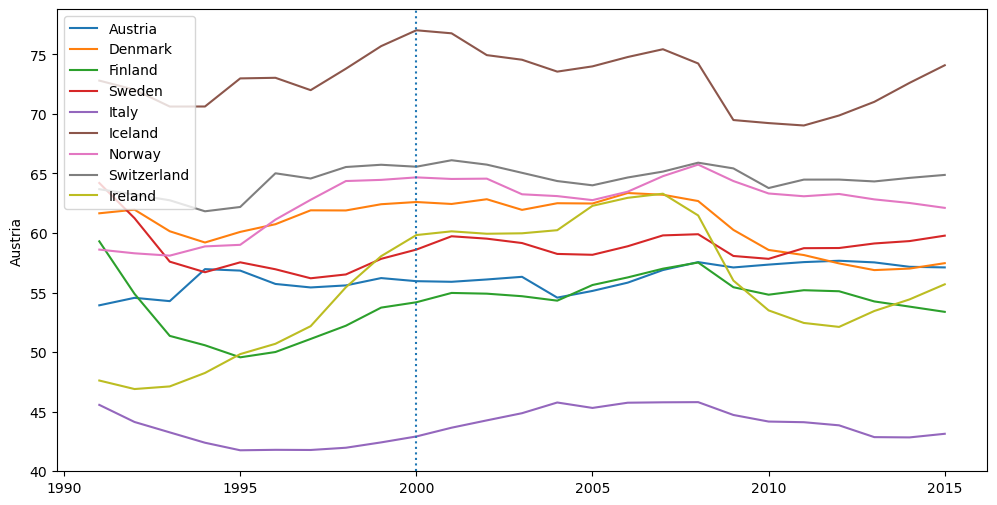

In [156]:
fig, ax = plt.subplots(figsize=(12,6))

for country in df.columns.tolist():
    sns.lineplot(data=df, x=df.index, y=country, label=country, ax=ax)

plt.axvline(x=2000, linestyle=':');

## Synthetic Control

In [157]:
df.head()

,Austria,Denmark,Finland,Sweden,Italy,Iceland,Norway,Switzerland,Ireland
1991,53.93,61.657,59.302,64.201,45.57,72.798,58.608,63.68,47.615
1992,54.558,61.96,54.893,61.245,44.134,72.035,58.297,63.225,46.9
1993,54.281,60.148,51.363,57.596,43.261,70.62,58.101,62.75,47.12
1994,56.969,59.204,50.575,56.709,42.392,70.624,58.877,61.825,48.251
1995,56.845,60.094,49.563,57.54,41.758,72.983,59.009,62.187,49.834


In [158]:
# Create the 4 dataframe for Synt. Control.
# pre-treatment, post-treatment, control, treated

y_co = df.drop(columns='Ireland')
y_tr = df['Ireland']

y_pre_co = y_co[y_co.index < 2000]
y_pre_tr = y_tr[y_tr.index < 2000]

y_post_co = y_co[y_co.index >= 2000]
y_post_tr = y_tr[y_tr.index >= 2000]

In [159]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False)
model.fit(y_pre_co, y_pre_tr)

        # extract the weights
weights_lr = model.coef_
weights_lr.round(3)

array([-0.042,  0.131,  1.192, -1.745, -0.431,  1.667,  0.095, -0.378])

c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

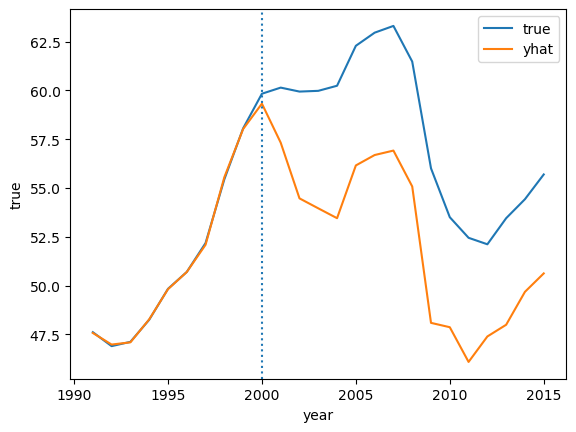

In [160]:
y0_hat = y_co.dot(weights_lr)
df_plot = pd.DataFrame({'year':y_co.index, 'true':y_tr, 'yhat':y0_hat})

fig, ax = plt.subplots()

for c in ['true','yhat']:
    sns.lineplot(data=df_plot, x='year', y=c, label=c, ax=ax)

plt.axvline(x=2000, linestyle=':');

In [161]:
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import (check_X_y, check_array,
                                               check_is_fitted)
import cvxpy as cp

class SyntheticControl(BaseEstimator, RegressorMixin):

    def __init__(self,):
        pass

    def fit(self, y_pre_co, y_pre_tr):

        y_pre_co, y_pre_tr = check_X_y(y_pre_co, y_pre_tr)
             
        w = cp.Variable(y_pre_co.shape[1])
                 
        objective = cp.Minimize(cp.sum_squares(y_pre_co@w - y_pre_tr))
        constraints = [cp.sum(w) == 1, w >= 0]
                 
        problem = cp.Problem(objective, constraints)
                 
        self.loss_ = problem.solve(verbose=False)
        self.w_ = w.value
                 
        self.is_fitted_ = True
        return self
                 
                 
    def predict(self, y_co):

        check_is_fitted(self)
        y_co = check_array(y_co)
                 
        return y_co @ self.w_

In [162]:
model = SyntheticControl()
model.fit(y_pre_co, y_pre_tr)

# extrac the weights
model.w_.round(3)

c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


array([0.   , 0.   , 0.   , 0.   , 0.529, 0.   , 0.471, 0.   ])

c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

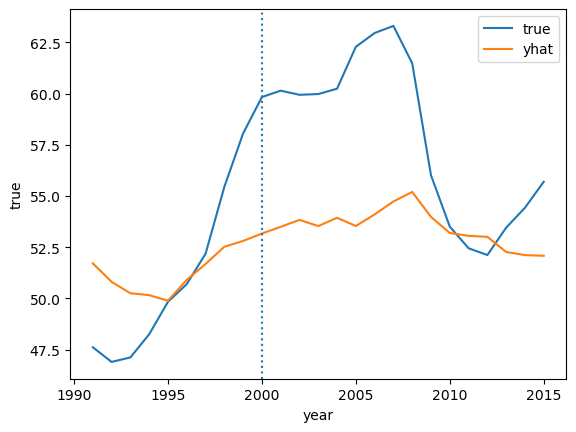

In [163]:
y0_hat = y_co.dot(model.w_)
df_plot = pd.DataFrame({'year':y_co.index, 'true':y_tr, 'yhat':y0_hat})

fig, ax = plt.subplots()

for c in ['true','yhat']:
    sns.lineplot(data=df_plot, x='year', y=c, label=c, ax=ax)

plt.axvline(x=2000, linestyle=':');

## Adding covariate to improve the model

### Understand the predictive power of X

In [164]:
path = r'C:\Users\matte\OneDrive\Desktop\GitHub\data\minimun w eff\gdp_by_country_eu.xlsx'

gdp = pd.read_excel(path)

gdp.head()

,Series Name,Series Code,Country Name,Country Code,1989 [YR1989],1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],...,2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
0,GDP (constant 2015 US$),NY.GDP.MKTP.KD,Germany,DEU,2.225205e+12,2.342139e+12,2.461782e+12,2.509124e+12,2.484613e+12,2.544043e+12,...,3.023170e+12,3.113153e+12,3.143036e+12,2.964077e+12,3.087972e+12,3.209180e+12,3.222611e+12,3.236713e+12,3.308229e+12,3.357586e+12
1,GDP (constant 2015 US$),NY.GDP.MKTP.KD,United Kingdom,GBR,1.754617e+12,1.767491e+12,1.747994e+12,1.755004e+12,1.798701e+12,1.867879e+12,...,2.659685e+12,2.729377e+12,2.723216e+12,2.597541e+12,2.655692e+12,2.686102e+12,2.726741e+12,2.775613e+12,2.864316e+12,2.927911e+12
2,GDP (constant 2015 US$),NY.GDP.MKTP.KD,Netherlands,NLD,4.464082e+11,4.650824e+11,4.764264e+11,4.845546e+11,4.906481e+11,5.051767e+11,...,7.125642e+11,7.394481e+11,7.554965e+11,7.277934e+11,7.375657e+11,7.490068e+11,7.412893e+11,7.403244e+11,7.508621e+11,7.655728e+11
3,GDP (constant 2015 US$),NY.GDP.MKTP.KD,Belgium,BEL,2.845294e+11,2.934562e+11,2.988355e+11,3.034096e+11,3.004912e+11,3.101880e+11,...,4.129290e+11,4.281119e+11,4.300252e+11,4.213355e+11,4.334038e+11,4.407479e+11,4.440060e+11,4.460450e+11,4.530860e+11,4.623356e+11
4,GDP (constant 2015 US$),NY.GDP.MKTP.KD,France,FRA,1.613902e+12,1.661091e+12,1.678502e+12,1.705347e+12,1.694626e+12,1.734592e+12,...,2.279283e+12,2.334550e+12,2.340502e+12,2.273252e+12,2.317568e+12,2.368385e+12,2.375801e+12,2.389493e+12,2.412341e+12,2.439189e+12


In [165]:
gdp = gdp.drop(columns=['Series Name', 'Series Code',
                        'Country Code'])

gdp = gdp[['Country Name']+[f'{i} [YR{i}]' for i in range(1989,2016)]]
gdp.rename(columns={'Country Name':'country'}, inplace=True)

gdp.head()

,country,1989 [YR1989],1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],1996 [YR1996],1997 [YR1997],...,2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
0,Germany,2.225205e+12,2.342139e+12,2.461782e+12,2.509124e+12,2.484613e+12,2.544043e+12,2.583326e+12,2.604143e+12,2.650814e+12,...,3.023170e+12,3.113153e+12,3.143036e+12,2.964077e+12,3.087972e+12,3.209180e+12,3.222611e+12,3.236713e+12,3.308229e+12,3.357586e+12
1,United Kingdom,1.754617e+12,1.767491e+12,1.747994e+12,1.755004e+12,1.798701e+12,1.867879e+12,1.915168e+12,1.964618e+12,2.061374e+12,...,2.659685e+12,2.729377e+12,2.723216e+12,2.597541e+12,2.655692e+12,2.686102e+12,2.726741e+12,2.775613e+12,2.864316e+12,2.927911e+12
2,Netherlands,4.464082e+11,4.650824e+11,4.764264e+11,4.845546e+11,4.906481e+11,5.051767e+11,5.209182e+11,5.391437e+11,5.624836e+11,...,7.125642e+11,7.394481e+11,7.554965e+11,7.277934e+11,7.375657e+11,7.490068e+11,7.412893e+11,7.403244e+11,7.508621e+11,7.655728e+11
3,Belgium,2.845294e+11,2.934562e+11,2.988355e+11,3.034096e+11,3.004912e+11,3.101880e+11,3.175852e+11,3.217819e+11,3.339892e+11,...,4.129290e+11,4.281119e+11,4.300252e+11,4.213355e+11,4.334038e+11,4.407479e+11,4.440060e+11,4.460450e+11,4.530860e+11,4.623356e+11
4,France,1.613902e+12,1.661091e+12,1.678502e+12,1.705347e+12,1.694626e+12,1.734592e+12,1.771134e+12,1.796160e+12,1.838123e+12,...,2.279283e+12,2.334550e+12,2.340502e+12,2.273252e+12,2.317568e+12,2.368385e+12,2.375801e+12,2.389493e+12,2.412341e+12,2.439189e+12


In [166]:
gdp = gdp.rename(columns={old_c: new_c for old_c, new_c in zip(gdp.columns.to_list()[1:], range(1989, 2016))})

In [167]:
gdp = gdp.T
gdp = gdp.rename(columns=gdp.iloc[0]).drop('country')
gdp.head()

,Germany,United Kingdom,Netherlands,Belgium,France,Finland
1989,2225204617485.912598,1754616510184.956299,446408196647.336914,284529373856.7854,1613901522615.432617,154936818098.437469
1990,2342139255489.101562,1767491105260.851318,465082446942.397461,293456205020.657654,1661090955411.702393,155975322164.062469
1991,2461781853866.615723,1747993528070.593262,476426432932.937317,298835475229.993958,1678502109603.766113,146794102994.140594
1992,2509123803633.369629,1755004416003.837402,484554605651.776794,303409615205.606445,1705347110174.84375,141957736303.906219
1993,2484613432320.154785,1798701060348.08252,490648132551.043152,300491199097.647827,1694626166709.982666,141017978885.546844


In [168]:
new_cols = [f'{i}_gdp' for i in gdp.columns.to_list()]

gdp = gdp.rename(columns={old:new for old,new in zip(gdp.columns.to_list(), new_cols)})
gdp = gdp.rename(columns={'United Kingdom_gdp':'uk_gdp'})

In [169]:
[df.shape, gdp.shape]

[(25, 9), (27, 6)]

In [185]:
#Change datatypes
gdp = gdp/1e12

for c in df.columns:
    df[c] = df[c].astype(float)

for c in gdp.columns:
    gdp[c] = gdp[c].astype(float)

try:
    gdp = gdp.drop([1989,1990])
except:
    pass

In [186]:
import statsmodels.formula.api as smf

c = 'Belgium_gdp'

df_reg = pd.merge(df[df.index >= 2000]['Ireland'], gdp[[c]], left_index=True, right_index=True)

result = smf.ols(f'Ireland ~ {c}', data=df_reg).fit()

result.summary().tables[1]

c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,89.4846,11.155,8.022,0.000,65.559,113.410
Belgium_gdp,-75.6740,26.730,-2.831,0.013,-133.004,-18.344


c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

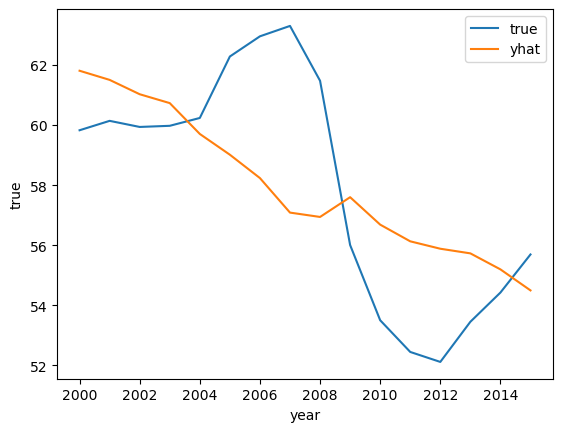

In [172]:
yhat = result.predict(df_reg[c])
df_plot = pd.DataFrame({'year':df_reg.index, 'true':df_reg['Ireland'],
                        'yhat':yhat})

fig, ax = plt.subplots()

for i in ['true', 'yhat']:
    sns.lineplot(data=df_plot, x='year', y=i, label=i, ax=ax)

### Implementing X

In [187]:
c_gdp = 'Belgium_gdp'

y_co = df.drop(columns='Ireland')
y_tr = df['Ireland']

y_pre_co = y_co[y_co.index < 2000]
y_pre_tr = y_tr[y_tr.index < 2000]
x_pre_co = gdp.loc[gdp.index < 2000, c_gdp]

y_post_co = y_co[y_co.index >= 2000]
y_post_tr = y_tr[y_tr.index >= 2000]
x_post_co = gdp.loc[gdp.index >= 2000, c_gdp]

In [188]:
def find_w_given_vs(vs, x_co_list, y_tr_pre):

    X_times_v = x_co_list[0] * vs[0]

    for year in x_co_list[0].index:
        X_times_v.loc[year, :] += x_co_list[1][year] * vs[1]
    
    return X_times_v

         
rndk = find_w_given_vs([1, 0],
                [y_pre_co, x_pre_co],
                y_pre_tr)

model = SyntheticControl()
model.fit(rndk, y_pre_tr)
[model.loss_, model.w_]

c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


[81.90595323839727,
 array([1.54274850e-08, 6.46669590e-09, 7.20934637e-09, 3.70394881e-09,
        5.28807814e-01, 3.83669162e-09, 4.71192143e-01, 6.72335515e-09])]

In [189]:
def find_w_given_vs(vs, x_co_list, y_tr_pre):

    X_times_v = x_co_list[0] * vs[0]

    for year in x_co_list[0].index:
        X_times_v.loc[year, :] += x_co_list[1][year] * vs[1]
    
    model = SyntheticControl()
    model.fit(X_times_v, y_tr_pre)
             
    return {"loss": model.loss_, "w": model.w_} 

         
find_w_given_vs([0, 0.9],
                [y_pre_co, x_pre_co],
                y_pre_tr)

c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\cvxpy\problems\problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


{'loss': 22973.390866469817,
 'w': array([0.12499998, 0.12499998, 0.12499998, 0.12499998, 0.12499998,
        0.12499998, 0.12499998, 0.12499998])}

In [190]:
from scipy.optimize import minimize

def v_loss(vs):
    return find_w_given_vs(vs,
                        [y_pre_co, x_pre_co],
                        y_pre_tr).get("loss")

v_solution = minimize(v_loss, [0, 0], method='L-BFGS-B')
v_solution.x

c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\cvxpy\problems\problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using 

array([ -0.29972414, 210.39675214])

In [191]:
w_cov = find_w_given_vs(v_solution.x,
                                 [y_pre_co, x_pre_co],
                                 y_pre_tr)

w_cov

c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


{'loss': 4.19321085021816,
 'w': array([9.99999740e-01, 1.01018091e-07, 5.43413139e-09, 7.18700266e-09,
        1.90333286e-08, 9.77105193e-09, 7.83025598e-08, 3.88905825e-08])}

In [193]:
vs = v_solution.x
x_co_list = [y_co, gdp[c_gdp]]

X_times_v = x_co_list[0] * vs[0]

for year in x_co_list[0].index:
    X_times_v.loc[year, :] += x_co_list[1][year] * vs[1]

X_times_v.dot(w_cov['w'])

1991    46.709890
1992    47.484048
1993    46.953046
1994    48.187556
1995    49.781075
1996    51.000044
1997    53.656540
1998    54.983855
1999    57.337559
2000    60.172785
2001    61.034467
2002    62.303815
2003    63.058212
2004    66.436935
2005    68.190158
2006    70.144415
2007    73.021442
2008    73.224689
2009    71.530680
2010    73.998173
2011    75.480104
2012    76.131725
2013    76.601800
2014    78.194394
2015    80.155759
dtype: float64

In [195]:
y_tr

1991    47.615
1992    46.900
1993    47.120
1994    48.251
1995    49.834
1996    50.699
1997    52.180
1998    55.445
1999    58.055
2000    59.829
2001    60.142
2002    59.939
2003    59.977
2004    60.238
2005    62.284
2006    62.956
2007    63.302
2008    61.476
2009    56.008
2010    53.504
2011    52.449
2012    52.117
2013    53.453
2014    54.426
2015    55.694
Name: Ireland, dtype: float64

c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

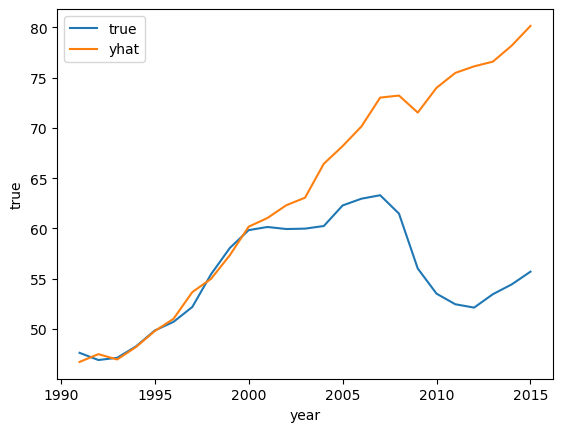

In [197]:
yhat = X_times_v.dot(w_cov['w'])
df_plot = pd.DataFrame({'year':yhat.index, 'true':df['Ireland'],
                        'yhat':yhat})

fig, ax = plt.subplots()

for i in ['true', 'yhat']:
    sns.lineplot(data=df_plot, x='year', y=i, label=i, ax=ax)